<a href="https://colab.research.google.com/github/00150/Practice-anything..../blob/main/%EA%B8%8D%EC%A0%95%2C_%EB%B3%B4%ED%86%B5_%2C%EB%B6%80%EC%A0%95_%EB%B6%84%EB%A5%98_%EB%AA%A8%EB%8D%B8(%EB%A6%AC%EB%B7%B0).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 리뷰데이터 : 감성 분류 & 긍정 / 부정 키워드 분석


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### 사용할 라이브러리 생성.

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# 데이터 불러오기.
url = '/content/drive/MyDrive/project3  file./train_df_token.csv'

train_df = pd.read_csv(url)

# 컬럼 : 'Unnamed: 0' 을 제거합니다.
train_df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [4]:
train_df.head(2)

,리뷰텍스트,label
0,정말 다 ~맛있는데 ~~ 난 먹을때마다 탕수육에서 냄새가 나는걸까?,3.0
1,몇 짐을 돌아오신건지 자장떡을 먹다 맘 ㅠㅠ,3.0


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11845 entries, 0 to 11844
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   리뷰텍스트   11845 non-null  object 
 1   label   11791 non-null  float64
dtypes: float64(1), object(1)
memory usage: 185.2+ KB


In [9]:
# 결측값이 존재하는 행만 추출합니다. 
train_df[train_df['label'].isnull()]

,리뷰텍스트,label


In [10]:
# 결측값이 존재하는 컬럼 : label에 값을 채워넣습니다. 
train_df.at[92,'label'] = 1
train_df.at[197,'label'] = 1
train_df.at[400,'label'] = 2
train_df.at[747,'label'] = 1
train_df.at[788,'label'] = 1
train_df.at[1051,'label'] = 1
train_df.at[1128,'label'] = 1
train_df.at[1223,'label'] = 1
train_df.at[1430,'label'] = 1
train_df.at[1620,'label'] = 1


train_df.at[1649,'label'] = 1
train_df.at[1900,'label'] = 1
train_df.at[1901,'label'] = 1
train_df.at[1902,'label'] = 1
train_df.at[2046,'label'] = 1


train_df.at[2242,'label'] = 1
train_df.at[2243,'label'] = 1
train_df.at[2244,'label'] = 1
train_df.at[2245,'label'] = 1
train_df.at[2417,'label'] = 1

train_df.at[2420,'label'] = 1
train_df.at[2579,'label'] = 1
train_df.at[2664,'label'] = 1
train_df.at[2969,'label'] = 1
train_df.at[3166,'label'] = 1

train_df.at[3237,'label'] = 1
train_df.at[3498,'label'] = 1
train_df.at[3710,'label'] = 1
train_df.at[3821,'label'] = 1
train_df.at[4017,'label'] = 3

train_df.at[4131,'label'] =1
train_df.at[4144,'label'] =1
train_df.at[4148,'label'] =1
train_df.at[4173,'label'] =1

train_df.at[4223,'label'] = 1
train_df.at[4940,'label'] = 1
train_df.at[5180,'label'] = 1
train_df.at[5284,'label'] = 1
train_df.at[5888,'label'] = 1

train_df.at[5890,'label'] = 1
train_df.at[5949,'label'] = 1
train_df.at[6071,'label'] = 1
train_df.at[6091,'label'] = 1
train_df.at[6220,'label'] = 1


train_df.at[6379,'label'] = 1
train_df.at[6510,'label'] = 1
train_df.at[6536,'label'] = 1
train_df.at[6617,'label'] = 1
train_df.at[6657,'label'] = 1

train_df.at[8874,'label'] = 1
train_df.at[9226,'label'] = 1
train_df.at[9635,'label'] = 1
train_df.at[9661,'label'] = 1
train_df.at[9888,'label'] = 1 

In [13]:
# 행의 결측값을 다시 한 번 확인합니다.
train_df['label'].isnull().sum()

0

In [15]:
# 타겟의 범주가 어떤 비율을 가지고 있는지 확인하기.
train_tg = train_df['label']
train_tg.value_counts(normalize=True)

1.0     0.882989
2.0     0.066442
3.0     0.049979
11.0    0.000507
33.0    0.000084
Name: label, dtype: float64

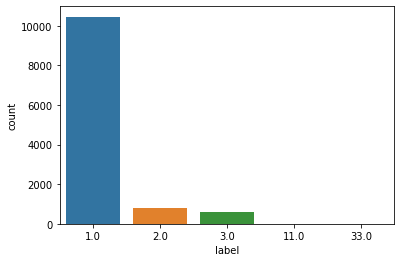

In [17]:
# 타겟 범주 비율을 시각화 합니다.

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.countplot(x=train_tg);

In [24]:
# 11 및 3으로 잘못 표기된 값들을 고쳐줍니다. 11 ->1, 33 -> 3

# 먼저 11로 작성된 데이터의 행의 위치를 살펴봅니다.
train_df[train_df['label'] == 11]

# 이후 텍스트를 확인하여 값을 변경해줍니다.
train_df.at[85,'label'] = 1
train_df.at[298,'label'] = 1 
train_df.at[3820,'label'] = 1 
train_df.at[8345,'label'] = 1
train_df.at[9102,'label'] = 1  
train_df.at[9866,'label'] = 1

# 마지막으로 11로 작성된 데이터의 행의 위치를 살펴봅니다.
train_df[train_df['label'] == 33]

# 이후 텍스트를 확인하여 값을 변경해줍니다.
train_df.at[8304,'label'] = 3

In [25]:
train_df[train_df['label'] == 33]

,리뷰텍스트,label


In [26]:
# 다시 한 번 값의 범주 비율을 확인합니다.
train_tg = train_df['label']
train_tg.value_counts(normalize=True)

1.0    0.883495
2.0    0.066442
3.0    0.050063
Name: label, dtype: float64

#### 클래스 불균형.
> 1의 값은 만족을 나타내고, 2는 보통, 3은 부정을 나타냅니다.

* 만족을 나타내는 값이 너무 많습니다, 추후 모델이 긍정만을 예측하는 경우가 생깁니다 <br/>

* 긍정리뷰를 잘 예측할 수 있으나, 부통과 부정에 관하여는 정확도가 매우 낮을 수 있습니다.



#### 데이터 전처리 

In [34]:
# 데이터 전처리

# 컬럼: 리뷰텍스트 구간에서 중복된 리뷰가 존재했습니다. 열을 지정하여 중복을 제거합니다.
train_df.drop_duplicates(['리뷰텍스트'], inplace=True)

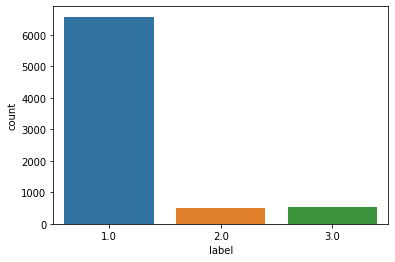

In [35]:
# 타겟 범주 비율을 시각화 합니다.

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.countplot(x=train_df['label']);

In [36]:
train_df['label'].value_counts()

1.0    6570
3.0     528
2.0     498
Name: label, dtype: int64

In [42]:
#긍정, 보통 및 불만족에 대한 데이터의 개수는 가장 낮은 보통을 나타내는 데이터의 개수를 기준으로 합니다.

# 개수를 일치하고, 각 값이 속한 인덱스 번호를 추출합니다.
positive_random_idx = train_df[train_df['label'] == 1].sample(498, random_state= 10).index.tolist()
normal_random_idx = train_df[train_df['label'] == 2].sample(498, random_state = 10).index.tolist()
nagative_random_idx = train_df[train_df['label'] == 3].sample(498, random_state = 10).index.tolist()


# 위에서 생성한 각각의 인덱스 값을 모두 더합니다.
train_random_idx = positive_random_idx + normal_random_idx + nagative_random_idx


---
## test_data 작업



In [68]:
# 테스트를 진행할 데이터 또한 가져옵니다.
url = '/content/drive/MyDrive/project3  file./test_df_token.csv'
test_df = pd.read_csv(url)

# label 컬럼 생성
test_df['label'] = ""


# 리뷰텍스트의 "" 값 제거
test_df = test_df[test_df.리뷰텍스트 !=""]
test_df = test_df[test_df.리뷰텍스트 !='없음']
test_df = test_df.dropna()
# 컬럼 : 'Unnamed: 0' 제거.
test_df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [70]:
test_df.shape

(2229, 2)

In [71]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2229 entries, 1 to 2505
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   리뷰텍스트   2229 non-null   object
 1   label   2229 non-null   object
dtypes: object(2)
memory usage: 52.2+ KB


#### 테스트 데이터 또한 전처리 작업을 진행합니다.

In [75]:
# 데이터 전처리

# 컬럼: 리뷰텍스트 구간에서 중복된 리뷰가 존재했습니다. 열을 지정하여 중복을 제거합니다.
test_df.drop_duplicates(['리뷰텍스트'], inplace=True)
test_df.shape

(1212, 2)

## 모델을 만들기 위한 작업
> 각각의 리뷰 텍스트를 토근화합니다.<br>
❗ 한글 텍스트의 경우, Okt 형태소 분석기를 활용하였습니다.

In [ ]:
# 필요한 라이브러리를 가져옵니다.
from wordcloud import WordCloud